## Presentación

Estos ejercicios tienen el fin de poder evaluar la situación en la que se encuentra cada unx de ustedes a esta altura de la materia. No es un examen, ni llevará ningún tipo de nota.

Les pedimos que respeten al pie de la letra el nombre de las funciones que les damos para completar y su "signature". Esto es, que respeten los argumentos de entrada y la salida. Esto es porque tenemos una forma de verificación automática que de otra manera no funciona. Cuando hayamos recibido los notebooks, haremos público el código de control.

Por supuesto, si quieren agregar celdas y más código, si quieren hacer pruebas para asegurarse de que el código funciona, etc., pueden hacerlo aquí mismo.

La _modalidad de entrega preferencial_ es a través de GitHub:
1. Hacer un fork del [repositorio](https://github.com/exord/UNSAM_IA), tocando el botón de arriba a la derecha (ver figura). 

2. Crear un subdirectorio dentro del directorio <tt>entregas</tt> con el formato "ApellidoNombre"
3. Completar este notebook y colocarlo en ese directorio. Hacer un "commit" y un "push" a su versión del repositorio.
4. Realizar un <tt>pull request</tt> desde GitHub y seguir las instrucciones. Más información en la [página de GitHub](https://help.github.com/en/github/collaborating-with-issues-and-pull-requests/about-pull-requests).

De ser necesario, en caso de sufrir de **alergia severa a GitHub**, el notebook puede enviarse por email.

La **fecha límite** para la entrega es el **martes 21 de abril a las 20 horas**.

<figure>
    <img src="figures/fork_pullrequest.jpeg", alt="Fork", width="800px", 
         style="float: left; margin-right: 10px;"/>
    
     <figcaption>Fig.1 - Ubicación de los botones para Fork y Pull request en Github.</figcaption>
</figure>

## 1. Probabilidad Condicional

In [0]:
#Si estas en Google Colab, ejecuta esta celda una unica vez:
!mkdir datasets
!mkdir datasets/student-alcohol-consumption
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/student-alcohol-consumption/student-mat.csv
!mv student-mat.csv datasets/student-alcohol-consumption/student-mat.csv

Similar al ***Caso: Apruebo si falto a clase?*** del [notebook de probabilidad condicional](02_Condicional.ipynb), calcule la probabilidad de que un alumno haya faltado menos de 3 veces dado que sacó más de un 60% en la materia, i.e.
$$
P( \text{absences} < 3 | \text{G3} \geq 12).
$$

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

In [74]:
import numpy as np
import pandas as pd
df=pd.read_csv('datasets/student-alcohol-consumption/student-mat.csv')
print("campos:\n",df.columns)
print("shape:",df.shape)

campos:
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
shape: (395, 33)


In [75]:

def prob_condicional(df):
    
    """Calcula P(absences < 3 | G3 >= 12).

    Input:
    df -- dataset de estudiantes

    Output:
    p        -- probabilidad de que absences > 3 dado que G3 >= 12
    """
    #Start
    
    alumnxs_tot=df.shape[0]

    P_H=(df['absences'] < 3).sum()/alumnxs_tot
    P_E=((df['G3']*5) >= 60).sum()/alumnxs_tot

    P_HandE=(((df['G3']*5) >= 60) & (df['absences'] < 3)).sum() / alumnxs_tot

    P_H_E=P_HandE/P_E

    #guarda el valor final, como un número, en esta variable
    resultado = P_H_E
    #Finish
    return resultado

In [76]:
prob_condicional(df)

0.5

Desarrollo:

Hipotesis: alumnx falto menos de 3 veces a clase --> df['absences'] < 3

Evento: saco mas de un 60% en la materia --> (df['G3']*5) > 60

$P(H|E)=?$ --> alumnx falto menos de 3 veces dado que se sabe que saco mas de 60% en el curso 

$P(H)$ --> probabilidad de faltar mas de 3 veces --> alumnxs_faltas_3/total_alumnxs

$P(E)$ --> probabilidad de aprobar con mas de 60 --> alumnxs_aprobados_60/total_alumnxs

$P(E|H)P(E)=P(H\cap E)$

$P(H\cap E)$ -->probabilidad de haber faltado menos de 3 Y haber sacado mas de 60 --> alumnxs_aprobados_60_y_faltas_3/total_alumnxs



$P(H|E) = \frac{P(E | H)\,P(H)}{P(E)}= \frac{P(E | H)\,P(H)}{P(E | H)\,P(H) + P(E | \bar{H}) P(\bar{H})}=\frac{P(H\cap E)}{P(E)}$


In [78]:
alumnxs_tot=df.shape[0]

P_H=(df['absences'] < 3).sum()/alumnxs_tot
P_E=((df['G3']*5) >= 60).sum()/alumnxs_tot

P_HandE=(((df['G3']*5) >= 60) & (df['absences'] < 3)).sum() / alumnxs_tot

P_H_E=P_HandE/P_E
P_H_E

0.5

## 2. Inferencia Bayesiana

Se tira una moneda N veces, de las cuales X sale cara. La moneda sale cara con una frecuencia $\mu$ desconocida, pero que se cree que es *fair*. 

Construya una función que recibe el vector con los N resultados (1: cara, 0: seca) y con él calcule tanto el posterior del parámetro $\mu$ como la probabilidad de que $\mu>0.7$. Use como prior una distribución normal con media 0.5 y desviación estandar 0.1 ($\mathcal{N}(0.5,0.1)$)

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: usar los métodos <tt>pdf</tt> y <tt>pmf</tt> de las clases de <tt>scipy.stats</tt> que se importan al principio de la celda. Revisar también los notebooks de [teoría](03_Inferencia.ipynb) y [práctica](03p_Inferencia_Soluciones.ipynb) que se presentaron en clase.

In [79]:
import numpy as np
from scipy.stats import binom, norm

In [103]:

def inferencia_moneda(tiradas, seed=123):
    """Realiza inferencia bayesiana en el parametro mu de una moneda.

    Input:
    tiradas -- Resultado de N tiradas
    seed    -- Semilla para np.random (default=123)

    Output:
    p        -- probabilidad de que mu>0.7
    posterior-- posterior de mu, shape=(100,)
    """
    np.random.seed(seed)
    mu, step = np.linspace(0,1,num=100, retstep=True) #step es el espacio entre puntos

    #Numero de tiradas, y de veces que salio cara
    N=len(tiradas)
    X=np.sum(tiradas)

    #Start
    prior = norm.pdf(mu,0.5,0.1) #Esto es el prior evaluado en el vector mu
    verosimilitud = binom.pmf(X,N,mu) #La verosimilitud evaluada en el vector mu
    posterior = prior*verosimilitud #el posterior no normalizado
    evidencia = step*posterior.sum() #evidencia o verosimilitud marginalizada
    posterior = posterior/evidencia #normalizamos para obtener el posterior
    
    p_100 = posterior[mu>0.7].sum() 
    p=p_100*0.01  #Probabilidad de que mu > 0.7
    #Finish
    assert len(posterior) == len(mu), "Tamaño del posterior distinto al de mu"
    return p, np.array(posterior)



Desarrollo:

N= numero de tiradas de la moneda

X= numero de veces que salio cara de las N tiradas

$\mu$=frecuencia desconocida con la que la moneda sale cara, como se cree que la moneda es fair ==> suponemos $\mu=0.5$

La verosimilitud P(XN|μ) se calcula como la funcion masa binomial --> BINOMIAL(X,N,mu)

De ahi Posterior= prior*verosimilitud

In [112]:
from matplotlib import pyplot as plt

mu, step = np.linspace(0,1,num=100, retstep=True) 

prior=norm.pdf(mu,0.5,0.1)

N=100
T=np.where(np.random.rand(N) < mu_t, 1, 0)
N = len(T)
X=np.sum(T)

#calcule: 
#posterior del parámetro  μ 
#la probabilidad de que  μ>0.7

verosimilitud = binom.pmf(X,N,mu)

posterior = prior*verosimilitud #el posterior no normalizado

evidencia = step*posterior.sum() #verosimilitud marginalizada
    
posterior = posterior/evidencia #normalizamos para obtener el posterior
    
p_100 = posterior[mu>0.7].sum() #Probabilidad de que mu > 0.7 

p=p_100*0.01

print(p)

2.546858476094624e-08


Test:

4.768321160189614e-07


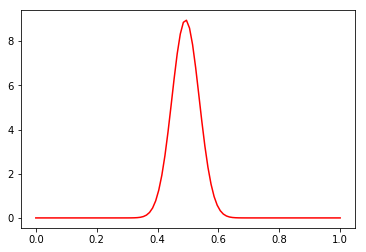

In [110]:

T=np.where(np.random.rand(100) < mu_t, 1, 0)

p_ans, array_ans = inferencia_moneda(T, seed=123)

print(p_ans)

plt.plot(mu,array_ans,'r')

## 3. Regresión Lineal

Construye una función que dado un input (X_train, Y_train) realice un ajuste lineal de cuadrados mínimos, y con ello devuelva las predicciones para el input X_test como un vector Y_test.

Por favor, utilice el siguiente signature. Se recomienda cambiar el código solamente entre los comentarios "Start" y "Finish". 
Si quiere probar cosas, siéntase libre de crear nuevas celdas de código, aunque estas no serán evaluadas.

<b>Ayuda</b>: pueden usar la implementación de las ecuaciones normales que aparece en el notebook de [modelos lineales](05_ModelosLineales.ipynb) o las clases del módulo <tt>sklearn.linear_model</tt>.

In [149]:
import numpy as np
from sklearn.model_selection import train_test_split

def ajuste_lineal(X_train, Y_train, X_test):
    """Calcula un ajuste lineal.

    Input:
    X_train -- datos de entrenamiento, shape=(N,1)
    Y_train -- etiquetas de entrenamiento, shape=(N,1)
    X_test  -- datos de testeo, shape=(N_test,1)

    Output:
    Y_test  -- prediccion de etiquetas para X_test, shape=(N_test,1)
    """

    N=len(X_train)
    N_test=len(X_test)
    #Start
      
        
    #Make the linear regression object and fit it to the train set.
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)

    #Predict and see scores.
    Y_pred = regr.predict(X_test)
  
    #ahora guardamos los resultados en esta variable
    Y_test = Y_pred
    #Finish
    
    #assert len(Y_test) == len(X_test), "Tamaño de Y_test distinto al de X_test"
    return np.array(Y_test)

##### Desarrollo:

Generacion de datos para la prueba de la funcion

In [158]:
import numpy.random as rr

def lineal_model_rand_data_gen(b,m,n):
    
    """
    Input:
    b = ordenada al origen
    m = pendiente
    n=numero de datos

    Output:
    datos_modelo_lineal_random
    """
    # creo un numero (de 100 elementos) random entre 0 y 1 lo multiplico por 2
    x_ = 2 * np.random.rand(n, 1)

    # El modelo real
    t_ = b + m * x_ #es una recta

    # Agregemos error normal a los datos
    t_ += np.random.randn(n, 1)

    data = np.hstack([x_, t_])
    
    return data


In [159]:
#datos y etiquetas:

import numpy.random as rr

b=4
m=5
n=100

data_custom_lineal=lineal_model_rand_data_gen(b,m,n)
X_custom_lineal=data_custom_lineal[0]
Y_custom_lineal=data_custom_lineal[1]

In [161]:
#separacion en Train y Test de la data del modelo lineal verdadero:
from sklearn.model_selection import train_test_split

x_train_cl, x_test_cl, y_train_cl, y_test_cl  = train_test_split(X_custom_lineal,Y_custom_lineal, test_size=0.2, random_state=1234)


In [172]:
x_train_cl=x_train_cl.reshape(-1, 1)
y_train_cl=y_train_cl.reshape(-1, 1)
x_test_cl=x_test_cl.reshape(-1, 1)
y_test_cl=y_test_cl.reshape(-1, 1)

In [179]:
cl_pred =ajuste_lineal(x_train_cl,y_train_cl, x_test_cl)

print('Mean squared error=', mean_squared_error(y_test_cl,cl_pred))

Mean squared error= 18.263277761776923


###### Prueba con  sets de datos Diabetes

In [132]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['disease progression'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [135]:
#Use all (10) features and separate betwen train and test set.
diabetes_X = diabetes.data
diabetes_Y = diabetes.target
seed = 104
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(diabetes_X, diabetes_Y, test_size = 0.2, random_state = seed)

In [177]:
diabetes_pred =ajuste_lineal(x_train_d, y_train_d, x_test_d)

print('The variance score is : {0}\n'.format(r2_score(y_test_d, diabetes_pred)))
print('Mean squared error=', mean_squared_error(y_test_d,diabetes_pred))

The variance score is : 0.5620438671817144

Mean squared error= 2623.531621851309
